# Projet numérique : choix du pas de temps 
### Bruno Le Corfec, Paul Dhalluin

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Pour déterminer la solution d'un problème tel que :
$$
\left\{
    \begin{array}{ll}
        \dot{x} = f(t, x)\\
        x(t_0) = x_0
    \end{array}
\right.
$$
différents schémas existent.

Tous les schémas du cours mentionnent des pas de temps $\Delta t_j$ sans jamais préciser comment les déterminer. Pourtant cette problématique est cruciale : si le pas est trop grand l'algorithme perd en précision, et s'il est trop petit la puissance de calcul nécessaire devient problématique.

On peut prendre un pas fixe, que l'on détermine empiriquement, ou à partir des constantes de temps du système, ou encore en l'optimisant en prenant en compte les erreurs d'arrondis.

Mais on peut également choisir un pas adapté au temps. Il s'agit d'utiliser un pas adapté à la précision que l'on tolère et à la finesse de résolution que demande l'instant.

C'est le sujet de ce projet numérique.

## Pas fixe

Dans un premier temps nous nous intéresserons à un pas non variable.

### Schéma d'ordre 1 

On considère un schéma d'Euler explicite.

#### Fonction solver

In [4]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    temps = np.arange(t0, tf, dt)
    x = [x0]
    for t in temps[:-1] :
        x.append(x[-1] + f(t,x[-1])*dt)
    return temps, np.array(x)

#### Tests

Testons notre fonction sur un problème de solution connue, typiquement :
$$
\left\{
    \begin{array}{ll}
        \dot{x} = x\\
        x(0) = 1
    \end{array}
\right.
$$
dont la solution est exponentielle.

Pour cela on code la fonction f sur laquelle on va tester notre solver pour plusieurs valeurs de dt :

In [18]:
def f(t, x):
    return x

##### dt = 0.1

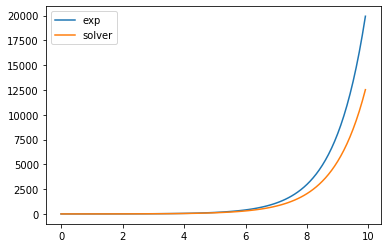

In [8]:
temps, x = solve_euler_explicit(f, 1, 0.1, 0, 10)
expo = np.exp(temps)
plt.plot(temps, expo, label = "exp")
plt.plot(temps, x, label = "solver")
plt.legend()
plt.show()

##### dt = 0.01

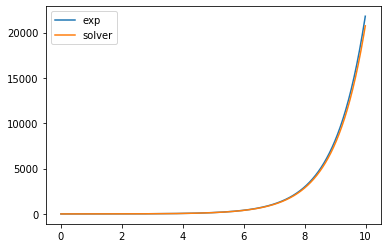

In [9]:
temps, x = solve_euler_explicit(f, 1, 0.01, 0, 10)
expo = np.exp(temps)
plt.plot(temps, expo, label = "exp")
plt.plot(temps, x, label = "solver")
plt.legend()
plt.show()

##### dt = 0.001

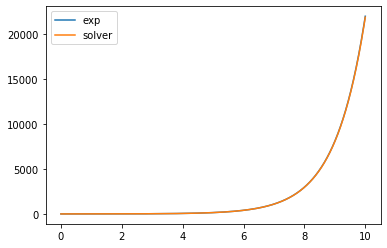

In [10]:
temps, x = solve_euler_explicit(f, 1, 0.001, 0, 10)
expo = np.exp(temps)
plt.plot(temps, expo, label = "exp")
plt.plot(temps, x, label = "solver")
plt.legend()
plt.show()

Les résultats sont concluants pour ce premier schéma

##### Convergence

Il s'agit d'illustrer la convergence d'ordre 1 du schéma : c'est-à-dire qu'il existe $c_v$ indépendant de $\Delta t$ tel que
$$ \max_{1 \leq j \leq J} ||x^j - x(t_j)|| \leq c_v \cdot \Delta t $$
Pour cela on écrit le code suivant :

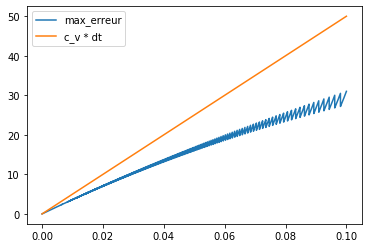

In [29]:
liste = []
listedt = np.arange(0.00001, 0.1, 0.00001)
for dt in listedt:
    temps, x = solve_euler_explicit(f, 1, dt, 0, 5)
    x1 = abs(x - np.exp(temps))
    maxi = max(x1)
    liste.append(maxi)

plt.plot(listedt, liste, label = "max_erreur")
plt.plot(listedt, 500*listedt, label = "c_v * dt")
plt.legend()
plt.show()

On a bien un $c_v$ qui illustre la convergence d'ordre 1.

Une autre manière de l'illustrer repose sur l'échelle logarithmique :

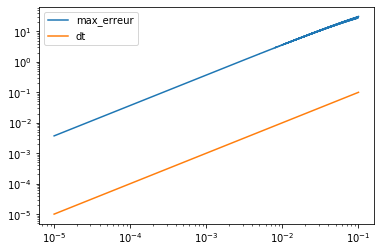

In [31]:
liste = []
listedt = np.arange(0.00001, 0.1, 0.00001)
for dt in listedt:
    temps, x = solve_euler_explicit(f, 1, dt, 0, 5)
    x1 = abs(x - np.exp(temps))
    maxi = max(x1)
    liste.append(maxi)

plt.yscale("log")
plt.xscale("log")
plt.plot(listedt, liste, label = "max_erreur")
plt.plot(listedt, listedt, label = "dt")
plt.legend()
plt.show()

On a bien la même pente pour les deux courbes. On illustre bien la convergence d'ordre 1.

### Schéma d'ordre 2

Nous avons décidé de nous intéresser à la méthode de Heun. L'aire est approximée par un trapèze et non plus par un rectangle comme pour Euler.

#### Fonction solver

In [32]:
def solve_heun_explicit(f, x0, dt, t0, tf):
    temps = np.arange(t0, tf, dt)
    x = [x0]
    for t in temps[:-1] :
        x.append(x[-1] + (f(t, x[-1]) + f(t + dt, x[-1] + dt*f(t, x[-1])))*dt/2)
    return temps, np.array(x)

#### Tests

De même que pour le schéma d'ordre 1, on teste la fonction sur le cas d'exponentielle pour différentes valeurs de dt.

##### dt = 0.1

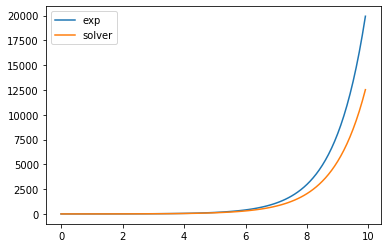

In [33]:
temps, x = solve_euler_explicit(f, 1, 0.1, 0, 10)
expo = np.exp(temps)
plt.plot(temps, expo, label = "exp")
plt.plot(temps, x, label = "solver")
plt.legend()
plt.show()

##### dt = 0.01

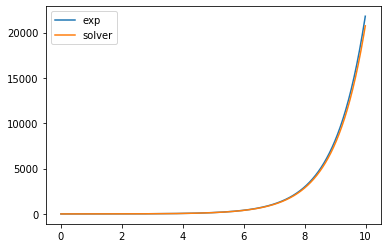

In [35]:
temps, x = solve_euler_explicit(f, 1, 0.01, 0, 10)
expo = np.exp(temps)
plt.plot(temps, expo, label = "exp")
plt.plot(temps, x, label = "solver")
plt.legend()
plt.show()

##### dt = 0.001

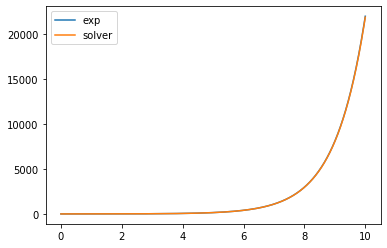

In [34]:
temps, x = solve_euler_explicit(f, 1, 0.001, 0, 10)
expo = np.exp(temps)
plt.plot(temps, expo, label = "exp")
plt.plot(temps, x, label = "solver")
plt.legend()
plt.show()

La méthode est concluante.

#### Convergence

Pour la convergence d'ordre 2 la méthode est très similaire tout comme le code :

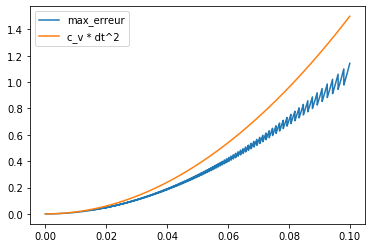

In [41]:
liste = []
listedt = np.arange(0.00001, 0.1, 0.00001)
for dt in listedt:
    temps, x = solve_heun_explicit(f, 1, dt, 0, 5)
    x1 = abs(x - np.exp(temps))
    maxi = max(x1)
    liste.append(maxi)

plt.plot(listedt, liste, label = "max_erreur")
plt.plot(listedt, 150*listedt**2, label = "c_v * dt^2")
plt.legend()
plt.show()

On a bien trouvé un $c_v$ qui permet d'illustrer la convergence d'ordre 2.

Passons à l'échelle logarithmique.

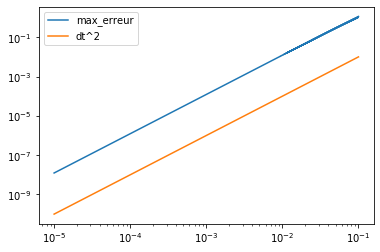

In [42]:
liste = []
listedt = np.arange(0.00001, 0.1, 0.00001)
for dt in listedt:
    temps, x = solve_heun_explicit(f, 1, dt, 0, 5)
    x1 = abs(x - np.exp(temps))
    maxi = max(x1)
    liste.append(maxi)

plt.yscale("log")
plt.xscale("log")
plt.plot(listedt, liste, label = "max_erreur")
plt.plot(listedt, listedt**2, label = "dt^2")
plt.legend()
plt.show()

On a bien la même pente : la convergence d'ordre 2 est illustrée.

## Explication de l'algorithme à pas de temps variable

In [43]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Cet algorithme se base sur une prévision de l'erreur et une adaptation du pas de temps pour que celle-ci ne pas dépasse pas un seuil. Il s'agit maintenant d'expliquer son fonctionnement.

##### Initialisation

On initialise un premier pas inférieur à $dt_{max}$ et supérieur à $dt_{min}$, c'est-à-dire entre les bornes que l'on s'est fixé pour le pas. Le point initial est ($t_0$, $x_0$). On initialise $t_i$ à 0. On expliquera son rôle par la suite.

##### Rôle des boucles

La première boucle fixe simplement le cadre dans le temps de la résolution. 

La solution étant échantillonnée à $dt_{max}$, la deuxième boucle fait en sorte de progresser de l'instant initial à un instant situé à environ $dt_{max}$ plus loin (le dt2DT se charge de revenir à $dt_{max}$). $t_i$ a un rôle de sous-compteur. Il quantifie la progression dans la partition de longueur $dt_{max}$.

##### Progression à pas variable

Partant d'un instant initial $t_j$ et d'un $dt_j$ initial, une méthode d'Euler permet de prédire le point situé à $dt_j$ de cet instant. La méthode d'Euler est ensuite appliquée dans le sens inverse. L'erreur a donc été commise deux fois. On parvient donc à une estimation de ||$e^{j+1}$|| en divisant la distance entre le point initial et le point reconstruit par 2. Grâce à la formule donnée précédemment on construit $dt_{j+1}$ (le 0.9 est simplement une mesure de précaution de plus). On vérifie alors que ce pas entre dans les critères voulus. Puis on applique Euler avec ce nouveau pas en prenant pour nouveau point initial celui que la méthode d'Euler nous avait indiqué avant que l'on ne l'applique dans l'autre sens.

On rappelle que seuls les points situés à multiples de $dt_{max}$ sont conservés pour la solution. Ainsi, le rôle de $t_i$ est de quantifier la progression dans le temps jusqu'au prochain point à conserver. Lorsque $t_i$ dépasse $dt_{max}$, il est remis à zéro, et une méthode d'Euler appliquée à l'envers de pas dt2DT (donc d'erreur négligeable, dt2DT étant inférieur au pas précédent), permet de ramener la progression à $dt_{max}$ du précédent point conservé. On relance alors la deuxiéme boucle en conservant ce point pour la solution.

##### Return

L'algorithme retourne la liste des x(t) et des t. La liste des temps contient des multiples de $dt_{max}$.